In [ ]:
%matplotlib inline

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.utils import to_categorical
from sklearn import datasets
from sklearn.pipeline import Pipeline
from joblib import dump,load
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, make_scorer

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!ls
%cd /content/gdrive/MyDrive/E222_project/DryBeanDataset/

gdrive	sample_data
/content/gdrive/MyDrive/E222_project/DryBeanDataset


In [5]:
import pandas as pd
dry_beans_dataset = pd.read_excel(r'Dry_Bean_Dataset.xlsx')

In [6]:
dry_beans_dataset.rename(columns = {"Area": "area", "Perimeter": "perimeter", "MajorAxisLength": "major_axis_length", "MinorAxisLength": "minor_axis_length", "AspectRation": "aspect_ratio", "Eccentricity": "eccentricity", "ConvexArea": "convex_area", "EquivDiameter": "equiv_diameter", "Extent": "extent", "Solidity": "solidity", "roundness": "roundness", "Compactness": "compactness", "ShapeFactor1": "shape_factor_1", "ShapeFactor2": "shape_factor_2", "ShapeFactor3": "shape_factor_3", "ShapeFactor4": "shape_factor_4", "Class": "Class"}, inplace = True)

In [7]:
def separate_features_from_labels(dataset):
    """
    Function: separates features from labels (classes).
    
    Parameters: dataset.
    
    Returns: tuple of features and labels as np.array.
    """
    return (dataset.drop("Class", axis = 1).values, dataset["Class"].values)

In [ ]:
(features, labels) = separate_features_from_labels(dry_beans_dataset)

In [10]:
#testing data = 10%, validation data = 10%, training data = 80% 
trval_features, test_features, trval_labels, test_labels = train_test_split(features, labels, test_size = 0.10, stratify = labels, random_state = 42)

train_features, val_features, train_labels, val_labels = train_test_split(trval_features, trval_labels, test_size = len(test_labels), stratify = trval_labels, random_state = 42)

In [ ]:
print(len(test_labels))
print(len(test_features))
print(len(trval_features))
print(len(val_features))

In [10]:
#proving the 80, 10, 10
train_features.shape, train_labels.shape, val_features.shape, val_labels.shape, test_features.shape, test_labels.shape

((10887, 16), (10887,), (1362, 16), (1362,), (1362, 16), (1362,))

In [11]:
def min_max_scaler(features):
    """
    Function: scales values betweeb 0 and 1.
    
    Parameters: dataset as an NumPy array.
    
    Returns: scaled NumPy array in float32 dtype.
    """
    max_n = np.max(features)
    min_n = np.min(features)
    features_scaled = np.array([(x - min_n) / (max_n - min_n) for x in features])
    return features_scaled.astype("float32")

In [12]:
train_features = min_max_scaler(train_features)
val_features = min_max_scaler(val_features)
test_features = min_max_scaler(test_features)

In [13]:
train_features.min(), train_features.max(), train_features.dtype

(0.0, 1.0, dtype('float32'))

In [14]:
train_labels_np = pd.get_dummies(train_labels).to_numpy()
val_labels_np = pd.get_dummies(val_labels).to_numpy()
test_labels_np = pd.get_dummies(test_labels).to_numpy()

In [ ]:
print(val_labels_np)

In [ ]:
print(train_labels_np)

In [ ]:
print(labels)

In [ ]:
print(test_labels_np)

In [15]:
le = LabelEncoder()

In [16]:
train_labels_enc = le.fit_transform(train_labels)
val_labels_enc = le.fit_transform(val_labels)
test_labels_enc = le.fit_transform(test_labels)

In [ ]:
#NEWLINE
labels_enc = le.fit_transform(labels)
print(labels_enc)

In [ ]:
print(train_labels_enc)

In [ ]:
print(test_labels_enc)

In [ ]:
print(val_labels_enc)

In [20]:
tf.keras.backend.clear_session()

In [21]:
input_shape = train_features.shape[1]

In [22]:
model = Sequential([
    Input(input_shape),
    Dense(64, activation = "relu"),
    Dropout(0.1),
    Dense(128, activation = "relu"),
    Dropout(0.1),
    Dense(256, activation = "relu"),
    Dropout(0.1),
    Dense(512, activation = "relu"),
    Dropout(0.1),
    Dense(256, activation = "relu"),
    Dropout(0.1),
    Dense(128, activation = "relu"),
    Dropout(0.1),
    Dense(64, activation = "relu"),
    Dense(7, activation = "softmax")
])

In [ ]:
model.summary()

In [ ]:
model.compile(loss = "categorical_crossentropy",
             optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001),
             metrics = ["accuracy"])

In [ ]:
history = model.fit(train_features, train_labels_np,
         epochs = 50,
         validation_data = (val_features, val_labels_np), verbose = 0)

In [ ]:
history = ada.fit(train_features, train_labels_np,
         epochs = 50,
         validation_data = (val_features, val_labels_np), verbose = 0)

In [ ]:
# Plot loss dynamics 
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["val_loss"], label = "validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Change of training and validation loss over time")
plt.show()

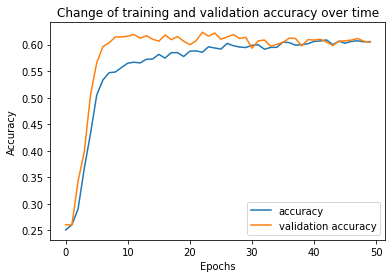

In [ ]:
# Plot accuracy dynamics
plt.plot(history.history["accuracy"], label = "accuracy")
plt.plot(history.history["val_accuracy"], label = "validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Change of training and validation accuracy over time")
plt.show()

In [ ]:
model_performance = model.evaluate(test_features, test_labels_np)

In [ ]:
print(f"Model loss on testing data is {model_performance[0]}")
print(f"Model accuracy on testing data is {model_performance[1]*100}%")

Model loss on testing data is 1.0262809991836548
Model accuracy on testing data is 56.02055788040161%


In [ ]:
f1 = make_scorer(f1_score , average = "weighted")

In [ ]:
params_ada = {
    "n_estimators": [5, 10, 15, 20],
    "learning_rate": [0.4, 0.6, 0.8, 1.0]
}

In [ ]:
gs_ada = GridSearchCV(AdaBoostClassifier(base_estimator = RandomForestClassifier(max_depth = 10, n_estimators = 20, random_state = 42)), param_grid = params_ada, scoring = f1, cv = 4, n_jobs = -1)

In [ ]:
gs_ada.fit(train_features, train_labels_enc)

In [ ]:
gs_ada.cv_results_

In [ ]:
gs_ada.best_params_

{'learning_rate': 1.0, 'n_estimators': 5}

In [32]:
ada = AdaBoostClassifier(base_estimator = RandomForestClassifier(max_depth = 10, n_estimators = 20, random_state = 42), n_estimators = 20, learning_rate = 0.6, random_state = 42).fit(train_features, train_labels_enc)

In [ ]:
dump(ada, 'ada_model.pkl')

['ada_model.pkl']

In [24]:
def classification_task(estimator, attributes, labels):
    """
    Function: "fit", "predict" and "score" values of an estimator.
    
    Parameters: estimator, attributes (X) and labels (y).
    
    Returns: model's performance measured as accuracy and f1_score.
    """
    estimator.fit(attributes, labels)
    predictions = estimator.predict(attributes)
    
    #print(f"Accuracy: {accuracy_score(labels, predictions)}")
    Accuracy = accuracy_score(labels, predictions)
    print(Accuracy)
    print(f"F1 score: {f1_score(labels, predictions, average = 'weighted')}")

In [ ]:
# Model performance on testing data
classification_task(ada, test_features, test_labels_enc)

In [26]:
# Model performance on training data
classification_task(ada, train_features, train_labels_enc)

0.9634426380086342
F1 score: 0.9634454571448137


In [ ]:
ada.fit(train_features, train_labels_enc)
train_prediction = ada.predict(train_features_1)
var = accuracy_score(train_labels_enc, train_prediction)
print(var)

In [25]:
ada.fit(train_features, train_labels_enc)
train_predictions = ada.predict(train_features)

In [26]:
var = accuracy_score(train_labels_enc, train_predictions)
print(var)


0.9634426380086342


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


['[[104, 0, 28, 0, 0, 0, 0], [0, 52, 0, 0, 0, 0, 0], [15, 0, 146, 0, 2, 0, 0], [3, 0, 0, 83, 6, 39, 223], [3, 0, 27, 0, 161, 0, 2], [53, 0, 0, 0, 0, 147, 3], [126, 0, 29, 0, 33, 4, 72]]',
 '[[1011, 0, 43, 0, 1, 0, 3], [0, 418, 0, 0, 0, 0, 0], [22, 0, 1278, 0, 4, 0, 0], [0, 0, 0, 2720, 1, 27, 88], [3, 0, 7, 9, 1511, 0, 12], [0, 0, 0, 19, 0, 1590, 12], [0, 0, 0, 136, 4, 7, 1960]]',
 '0.56208670095518',
 '0.9634392798089289',
 'hello',
 'Again hello']

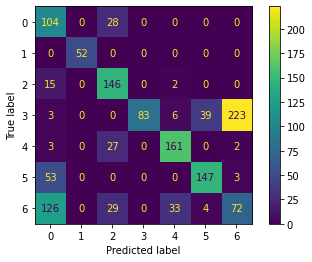

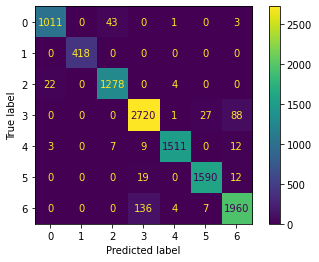

In [42]:
import numpy as np
from joblib import load
import json
from sklearn import datasets
import pandas as pd
import os
from flask import jsonify, render_template, request, redirect, url_for
from flask import send_file
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

UPLOAD_FOLDER='.'

bean_label_data = pd.read_csv("class_labels_new.csv", header=None)
labels = bean_label_data.to_numpy()

labels_csv = pd.read_csv("labels_new.csv")
labels_1 = labels_csv.to_numpy()

test_labels_np = pd.read_csv("test_labels_np.csv")
test_labels_np_1 = test_labels_np.to_numpy()

test_labels_enc = pd.read_csv("test_labels_enc.csv")
test_labels_enc_1 = test_labels_enc.to_numpy()

train_labels_enc = pd.read_csv("train_labels_enc.csv")
train_labels_enc_1 = test_labels_enc.to_numpy()

train_features = pd.read_csv("train_features.csv")
train_features_1 = train_features.to_numpy()



def model_explanation(file_name):
  my_model = load('ada_model.pkl')
  missing_value=["Undefined"]
  user_arry = pd.read_csv(file_name, na_values=missing_value)
  test_prediction = my_model.predict(user_arry)
  train_prediction = my_model.predict(train_features_1)
  test_accuracy = accuracy_score(test_labels_enc_1, test_prediction)
  train_accuracy = accuracy_score(train_labels_enc, train_prediction)
  train_accuracy = train_accuracy.tolist()
  test_accuracy = test_accuracy.tolist()
  train_scores_str = json.dumps(train_accuracy)
  test_scores_str = json.dumps(test_accuracy)

  test_results = confusion_matrix(test_labels_enc_1, test_prediction)
  cm_display = ConfusionMatrixDisplay(test_results).plot()
  plt.savefig("testing_cm.png")
  test_results = test_results.tolist()
  cm_test_str = json.dumps(test_results)
 
  train_results = confusion_matrix(train_labels_enc, train_prediction)
  cm_display = ConfusionMatrixDisplay(train_results).plot()
  plt.savefig("training_cm.png")
  train_results = train_results.tolist()
  cm_train_str = json.dumps(train_results)
  
  

  all_results = [cm_test_str, cm_train_str, test_scores_str, train_scores_str, "hello", "Again hello"]
  return all_results
  df = pd.DataFrame(all_results)
  a = df.to_csv("input_and_training_results.csv")
  new_json = df.to_json
  return new_json
  path = os.path.join(UPLOAD_FLDER, a)
  return send_file(path, as_attachment=True)

model_explanation("temp_features.csv")

In [ ]:
# Model performance on validation data
classification_task(ada, val_features, val_labels_enc)

0.9963289280469897
F1 score: 0.9963286163312866


In [ ]:
# Model performance on testing data
classification_task(ada, test_features, test_labels_enc)

Accuracy: 0.9963289280469897
F1 score: 0.9963306032353164


In [ ]:
#saving all labels to csv
Y = dry_beans_dataset.Class.unique()
a = np.asarray(Y)
pd.DataFrame(a).to_csv('class_labels_new.csv',index=False, header=False)
bean_label_data = pd.read_csv("class_labels_new.csv", header=None)
labels = bean_label_data.to_numpy()
print("class_labels_new.csv = labels\nlabels:\n", a)

#saving all features to csv
new_test = np.transpose(test_features[0])
new_test = new_test[None,...]
a = np.asarray(new_test)
pd.DataFrame(a).to_csv('features_xtest.csv',index=False, header=False)
bean_feature_data = pd.read_csv("features_xtest.csv")
print("\nfeatures_xtest.csv = first row/bean\nfirst row:\n", a)

#saving all test features to csv
a = np.asarray(test_features)
pd.DataFrame(a).to_csv('temp_features.csv',index=False, header=False)
bean_feature_data = pd.read_csv("temp_features.csv")
print("\ntest_features.csv = all features\ntest features:\n", a)


#saving test_labels_np to csv
a = np.asarray(test_labels_np)
pd.DataFrame(a).to_csv('test_labels_np.csv',index=False, header=False)
test_labels_np_1 = pd.read_csv("test_labels_np.csv")
print("\ntest_labels_np.csv = test_labels_np\ntest_labels_np:\n", a)

#saving test_labels_np to csv
a = np.asarray(test_labels_enc)
pd.DataFrame(a).to_csv('test_labels_enc.csv',index=False, header=False)
test_labels_np_1 = pd.read_csv("test_labels_enc.csv")
print("\ntest_labels_np.csv = test_labels_enc\ntest_labels_enc:\n", a)


a = np.asarray(train_labels_enc)
pd.DataFrame(a).to_csv('train_labels_enc.csv',index=False, header=False)
train_labels_enc_1 = pd.read_csv("train_labels_enc.csv")



a = np.asarray(train_features)
pd.DataFrame(a).to_csv('train_features.csv',index=False, header=False)
train_features_1 = pd.read_csv("train_features.csv")

#saving afirst two rows to csv
a = np.asarray(test_features[:2])
pd.DataFrame(a).to_csv('test.csv',index=False, header=False)
bean_feature_data = pd.read_csv("test.csv")


#if i create csv with [:1], will it make a difference
#saving all features to csv
#test to see if deault is 20 rows
a = np.asarray(test_features[:1])
pd.DataFrame(a).to_csv('test2.csv',index=False, header=False)
bean_feature_data = pd.read_csv("test2.csv") 

In [ ]:
#PLOTTING CONFUSION MATRIX/DONT NEED:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    #remove parameters to function 
    my_model = load('ada_model.pkl')
    missing_value=["Undefined"]
    user_arry = pd.read_csv(file_name, na_values=missing_value)
    test_prediction = my_model.predict(user_arry)
  
    normalize=False
    title=None
    cmap=plt.cm.Blues
    y_test = test_labels_enc_1
    y_pred = test_prediction
    classes = labels
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix    
    cm = confusion_matrix(y_true,y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    bytes_image = io.BytesIO()
    plt.savefig(bytes_image, format='png')
    bytes_image.seek(0)
    return bytes_image
  
  
def gen_cof_mat(file_name):#norm1):
    my_model = load('ada_model.pkl')
    missing_value=["Undefined"]
    user_arry = pd.read_csv(file_name, na_values=missing_value)
    test_prediction = my_model.predict(user_arry)
    y_pred = test_prediction
    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    # Plot normalized confusion matrix
    bytes_obj = plot_confusion_matrix(y_test, y_pred, classes=labels)#, normalize=norm1)

    return send_file(bytes_obj,
                     attachment_filename='plot.png',
                     mimetype='image/png')
